In [1]:
import pymc3 as pm
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("/home/daniel/papers/thesis/thesis-style.mpl")

In [ ]:
import scipy.ndimage
from scipy.ndimage.filters import gaussian_filter
from matplotlib import colors, ticker, cm

In [2]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

This is a function to produce each of the surface plots

In [52]:
def make_surface_plot(data, cmap="magma_r", cmap_range = (40,90,11)):

    # Use the golden ratio for our plots
    width = 3.487 #* 2
    height = width / 1.618


    matplotlib.rcParams.update({'font.size': 6})

    scenarios = {
        "2020+": 20,
        "2024+": 40
                }

    f, ax = plt.subplots(1,1, sharex=True, figsize = (width, height))

    ax.set_xlim([10, 100]);

    vth = 4./3 * np.pi 
    for scenario in scenarios.iteritems():
        ax.vlines(scenario[1], 0, 19, color='k', alpha=0.5, lw=2)
        x_bounds = ax.get_xlim()
        ax.annotate(s=scenario[0], xy =(((scenario[1]-x_bounds[0])/(x_bounds[1]-x_bounds[0])),1.01), xycoords='axes fraction', verticalalignment='right', rotation = 0)

    # Smooth out the contours slightly to make up for the numerical jitter that the BCI introduces
    sigma = 0.7
    data = gaussian_filter(data, sigma)

    consf = ax.contourf(np.linspace(10, 100, data.shape[1]), np.linspace(0, 19, data.shape[0]), 
                 data, 
                 levels = np.linspace(*cmap_range), alpha = 0.6, cmap = cmap, lw=0
                )


    ax.get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', linewidth=1.0, color="#DDDDDD")
    ax.grid(b=True, which='minor', linewidth=0.5)
    cb=f.colorbar(consf)
    ax.set_xlabel(r"Search 4-volume, $VT\, [\times10^6\, \rm{Mpc}^3 \rm{yr}]$")
    ax.set_ylabel(r"GW BNS event rate [${\rm yr}^{-1}$]")

    cb.set_label('Beaming angle upper limit [$^{\circ}$]')
    f.subplots_adjust(0.1, 0.15, 1, .95, wspace=0.05)
    return f

The script to produce the data for these plots outputs the data into multiple different files, which is a bit inconvenient to handle. Let's wrap them into one file (and a single variable).

In [62]:
def assemble_data(prefix, upper_l=10):
    upper = []
    for i in range(1,upper_l):
        input = np.loadtxt("../data/{}-{}.0.dat".format(prefix, i*10))
        upper.append(input.reshape(20,upper_l))
    data = np.hstack(upper)

    np.savetxt("{}-full.dat".format(prefix), data)
    return data

We can then use this to produce each of the four plots contained within the paper.

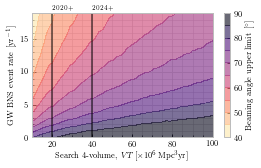

In [64]:
jeffreys_upper = assemble_data("jeffreys-upper")
f = make_surface_plot(jeffreys_upper)
f.savefig("jeffreys-upper-surface.png")

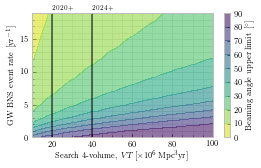

In [65]:
delta_upper = assemble_data("1.0-upper")
f = make_surface_plot(delta_upper, cmap="viridis_r", cmap_range=(0,90,10))
f.savefig("1.0-upper-surface.png")

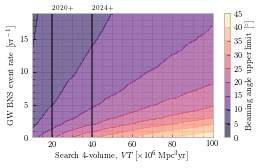

In [68]:
jeffreys_lower = assemble_data("jeffreys-lower")
f = make_surface_plot(jeffreys_lower, cmap="magma", cmap_range=(0,45,10))
f.savefig("jeffreys-lower-surface.png")

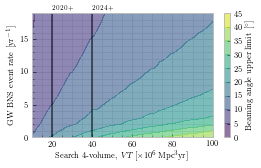

In [69]:
delta_lower = assemble_data("1.0-lower")
f = make_surface_plot(delta_lower, cmap="viridis", cmap_range=(0,45,10))
f.savefig("1.0-lower-surface.png")